# Exploratory Data Analysis (EDA)
This notebook try to understand the data quality.
There are some folders which are **NOT** consistancy named. Run this notebook first before creating a model to ensure data readiness.

## Import Libraries

In [1]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

## Dataset Constants
Datasets are located in `../datasets` relative to this notebook and contains of three subset: `train`, `validation` and `test`.

There are 4 categories that will be classified:
- `architecture`
- `art and culture`
- `food and drinks`
- `travel and adventure`

In [2]:
DATASET_DIR = '../datasets'
SUBSETS = ['train', 'validation']
CLASSES = ['architecture', 'art and culture', 'food and drinks', 'travel and adventure']

## Dataset Completency
Let's check our dataset folder structure and format.

In [3]:
data_paths = []
for subset in SUBSETS:
    for class_name in CLASSES:
        # Ensure dataset exists
        class_dir = f'{DATASET_DIR}/{subset}/{class_name}'
        assert os.path.exists(class_dir), f"Missing dataset for {class_dir}"

        # Get all image paths
        paths = glob.glob(f'{class_dir}/*')
        data_paths.extend([{
            'subset': subset,
            'class': class_name,
            'path': path,
        } for path in paths])

df_image = pd.DataFrame(data_paths)
df_image

,subset,class,path
0,train,architecture,../datasets/train/architecture/2307645771_b14c...
1,train,architecture,../datasets/train/architecture/15944714186_76d...
2,train,architecture,../datasets/train/architecture/16256636865_830...
3,train,architecture,../datasets/train/architecture/7286075678_5ee8...
4,train,architecture,../datasets/train/architecture/5142815129_985b...
...,...,...,...
35103,validation,travel and adventure,../datasets/validation/travel and adventure/5.jpg
35104,validation,travel and adventure,../datasets/validation/travel and adventure/19...
35105,validation,travel and adventure,../datasets/validation/travel and adventure/3.jpg
35106,validation,travel and adventure,../datasets/validation/travel and adventure/0.jpg


## Subset
Ensure there are two subset.

In [4]:
assert df_image['subset'].unique().tolist() == ['train', 'validation'], "Dataset should contains two subset, train and validation."

print('Subset Distribution')
df_image['subset'].value_counts()

Subset Distribution


subset
train         34993
validation      115
Name: count, dtype: int64

## Class Distribution

In [5]:
print(f'Class Distribution for subset "train"')
df_image[df_image['subset'] == 'train']['class'].value_counts()

Class Distribution for subset "train"


class
travel and adventure    8800
food and drinks         8782
art and culture         8750
architecture            8661
Name: count, dtype: int64

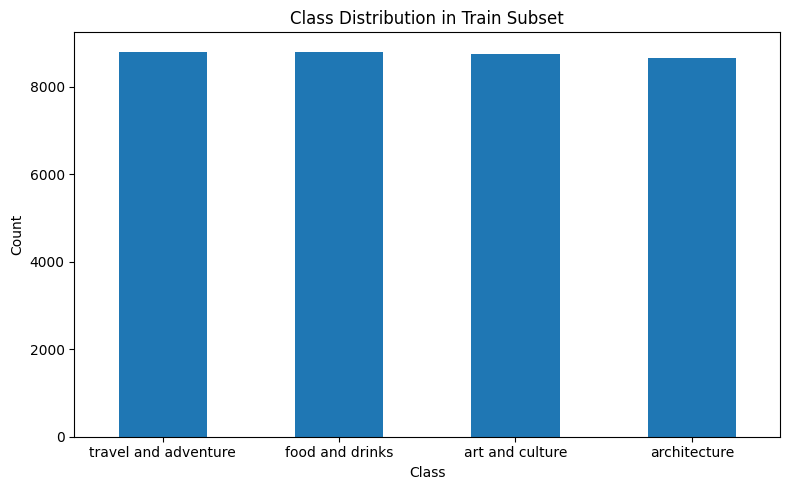

In [ ]:
# Plot
plt.figure(figsize=(8,5))
counts = df_image[df_image['subset'] == 'train']['class'].value_counts()
counts.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution in Train Subset')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [6]:
print(f'Class Distribution for subset "validation"')
df_image[df_image['subset'] == 'validation']['class'].value_counts()

Class Distribution for subset "validation"


class
architecture            30
art and culture         30
food and drinks         30
travel and adventure    25
Name: count, dtype: int64

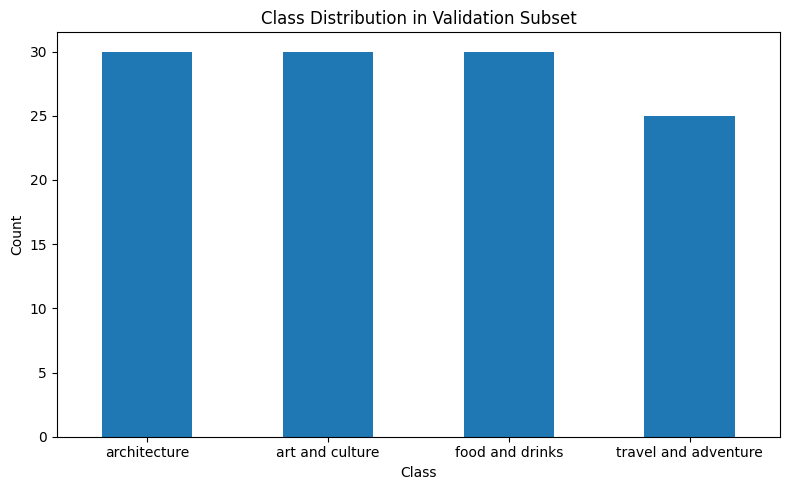

In [13]:
# Plot
plt.figure(figsize=(8,5))
counts = df_image[df_image['subset'] == 'validation']['class'].value_counts()
counts.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution in Validation Subset')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Look's like all categories especially in `train` subset are well balanced and good for training Deep Learning model.

## Image Resolution
Let's check the image resolution, and find at what image size is good for model input.

In [ ]:
def get_image_resolution(path):
    try:
        with Image.open(path) as img:
            return pd.Series(list(img.size) + [None, ])

    except Exception as e:
        print(f"Warning: Could not open image {path}. Error: {e}")
        return pd.Series([None, None, str(e)])

df_image[['width', 'height', 'error']] = df_image['path'].apply(get_image_resolution)
df_image.head()

/anaconda/envs/tsel-image-cls/lib/python3.9/site-packages/PIL/TiffImagePlugin.py:950: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


,subset,class,path,width,height,error
0,train,architecture,../datasets/train/architecture/2307645771_b14c...,128.0,128.0,NaN
1,train,architecture,../datasets/train/architecture/15944714186_76d...,128.0,128.0,NaN
2,train,architecture,../datasets/train/architecture/16256636865_830...,128.0,128.0,NaN
3,train,architecture,../datasets/train/architecture/7286075678_5ee8...,128.0,128.0,NaN
4,train,architecture,../datasets/train/architecture/5142815129_985b...,128.0,128.0,NaN


In [8]:
# Check whether there are any invalid images
assert df_image['error'].notna().sum() == 0, "There are some invalid images!"

In [9]:
# Summarize image size
df_image[['width', 'height']].describe()

,width,height
count,35108.000000,35108.000000
mean,379.976359,318.730062
std,417.904200,309.923573
min,100.000000,92.000000
25%,128.000000,128.000000
50%,256.000000,256.000000
75%,321.000000,320.000000
max,7360.000000,6160.000000


Based on statistics, the mean for `width` x `height` is approximately **`380` x `320`**.
We will use this value as our input size because it will have a good image ratio.

In [10]:
# Save dataset table
df_image.to_csv(f'../datasets/dataset.csv', sep=';', index=False)